# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [247]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [248]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [249]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 82.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 85.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.4MB/s]


In [250]:
data = pd.read_csv('./train.csv')
data_test = pd.read_csv('test.csv')

In [251]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]


feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные строчки в нашем датасете

In [252]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1597,10,74.15,811.8,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
4960,10,85.60,813.85,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
716,49,107.95,5293.2,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),1
3211,10,29.65,291.4,Female,1,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
1064,30,21.25,711.9,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3326,2,19.60,35.85,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,1
4220,70,80.70,5617.95,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Electronic check,0
4981,2,79.20,172.85,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,1
2390,23,40.65,947.4,Male,0,No,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),0
4533,1,80.55,80.55,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0


Посмотрим, есть ли пустые строчки в датасете

In [253]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Пустых строчек нет

In [254]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


Заменим пустые строки в колонке TotalSpent на 0

In [255]:
data["TotalSpent"] = data["TotalSpent"].replace(' ', '0').astype('float')
data_test["TotalSpent"] = data_test["TotalSpent"].replace(' ', '0').astype('float')

In [256]:
print(f"Повторяющиеся строки: {data.duplicated(keep=False).sum()}")
print(f"Повторяющиеся строки, не учитывая target: {data.drop(target_col, axis=1).duplicated(keep=False).sum()}")

Повторяющиеся строки: 28
Повторяющиеся строки, не учитывая target: 41


Уберём повторяющиеся значения

In [257]:
data[data.drop(target_col, axis=1).duplicated(keep=False)].sort_values(by=[*data.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20.00,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20.00,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3735,1,20.20,20.20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


Посмотрим, есть ли пропуски, которые являлись пустой строкой

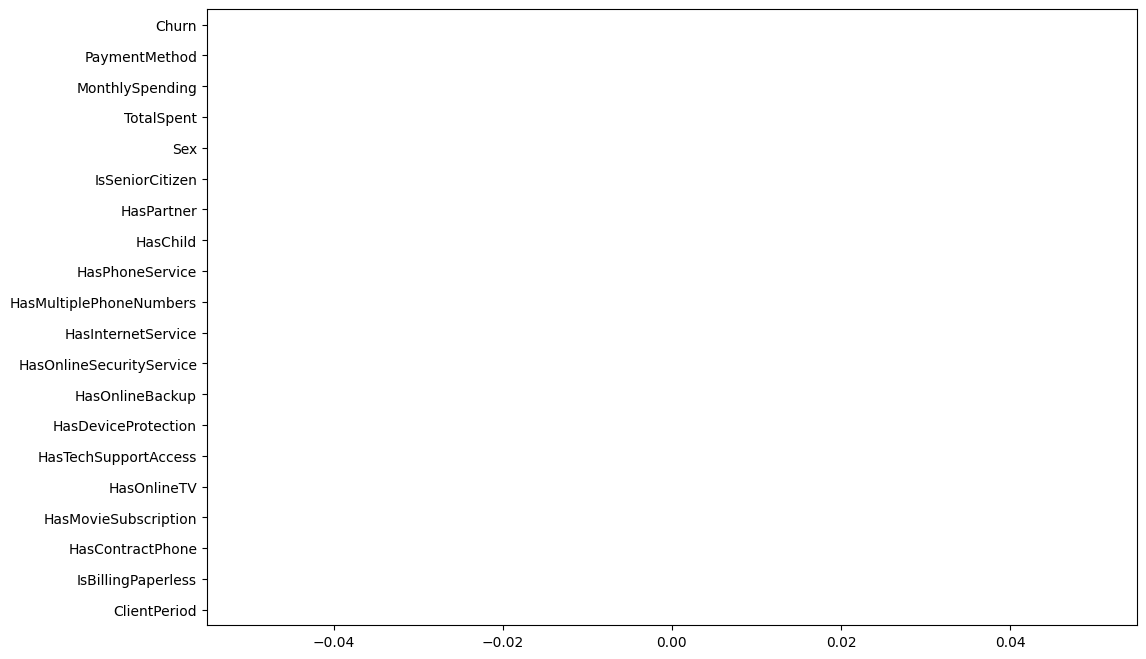

In [258]:
data.replace(" ", np.nan, inplace=True)
pd.DataFrame(data.isna().sum(), columns=["NaN Count"]) \
    .sort_values("NaN Count") \
    .plot(kind="barh", legend=False, figsize=(12, 8));


Больше их нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

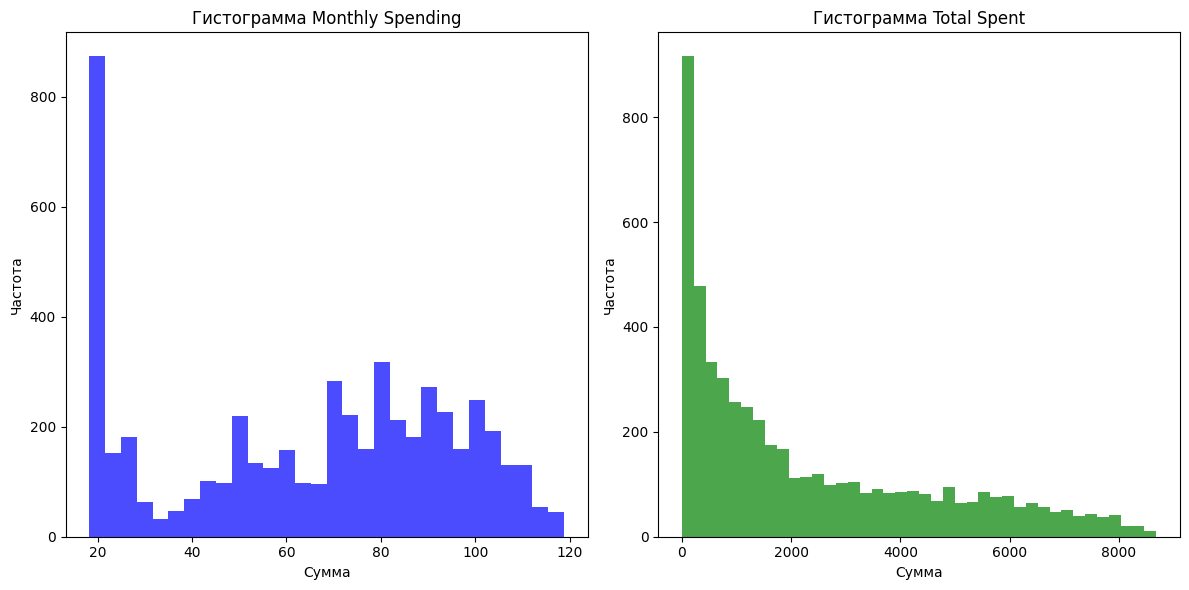

In [259]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['MonthlySpending'], bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма Monthly Spending')
plt.xlabel('Сумма')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(data['TotalSpent'], bins=40, color='green', alpha=0.7)
plt.title('Гистограмма Total Spent')
plt.xlabel('Сумма')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()



Как видно из графиков, очень много значений трат находятся около 0

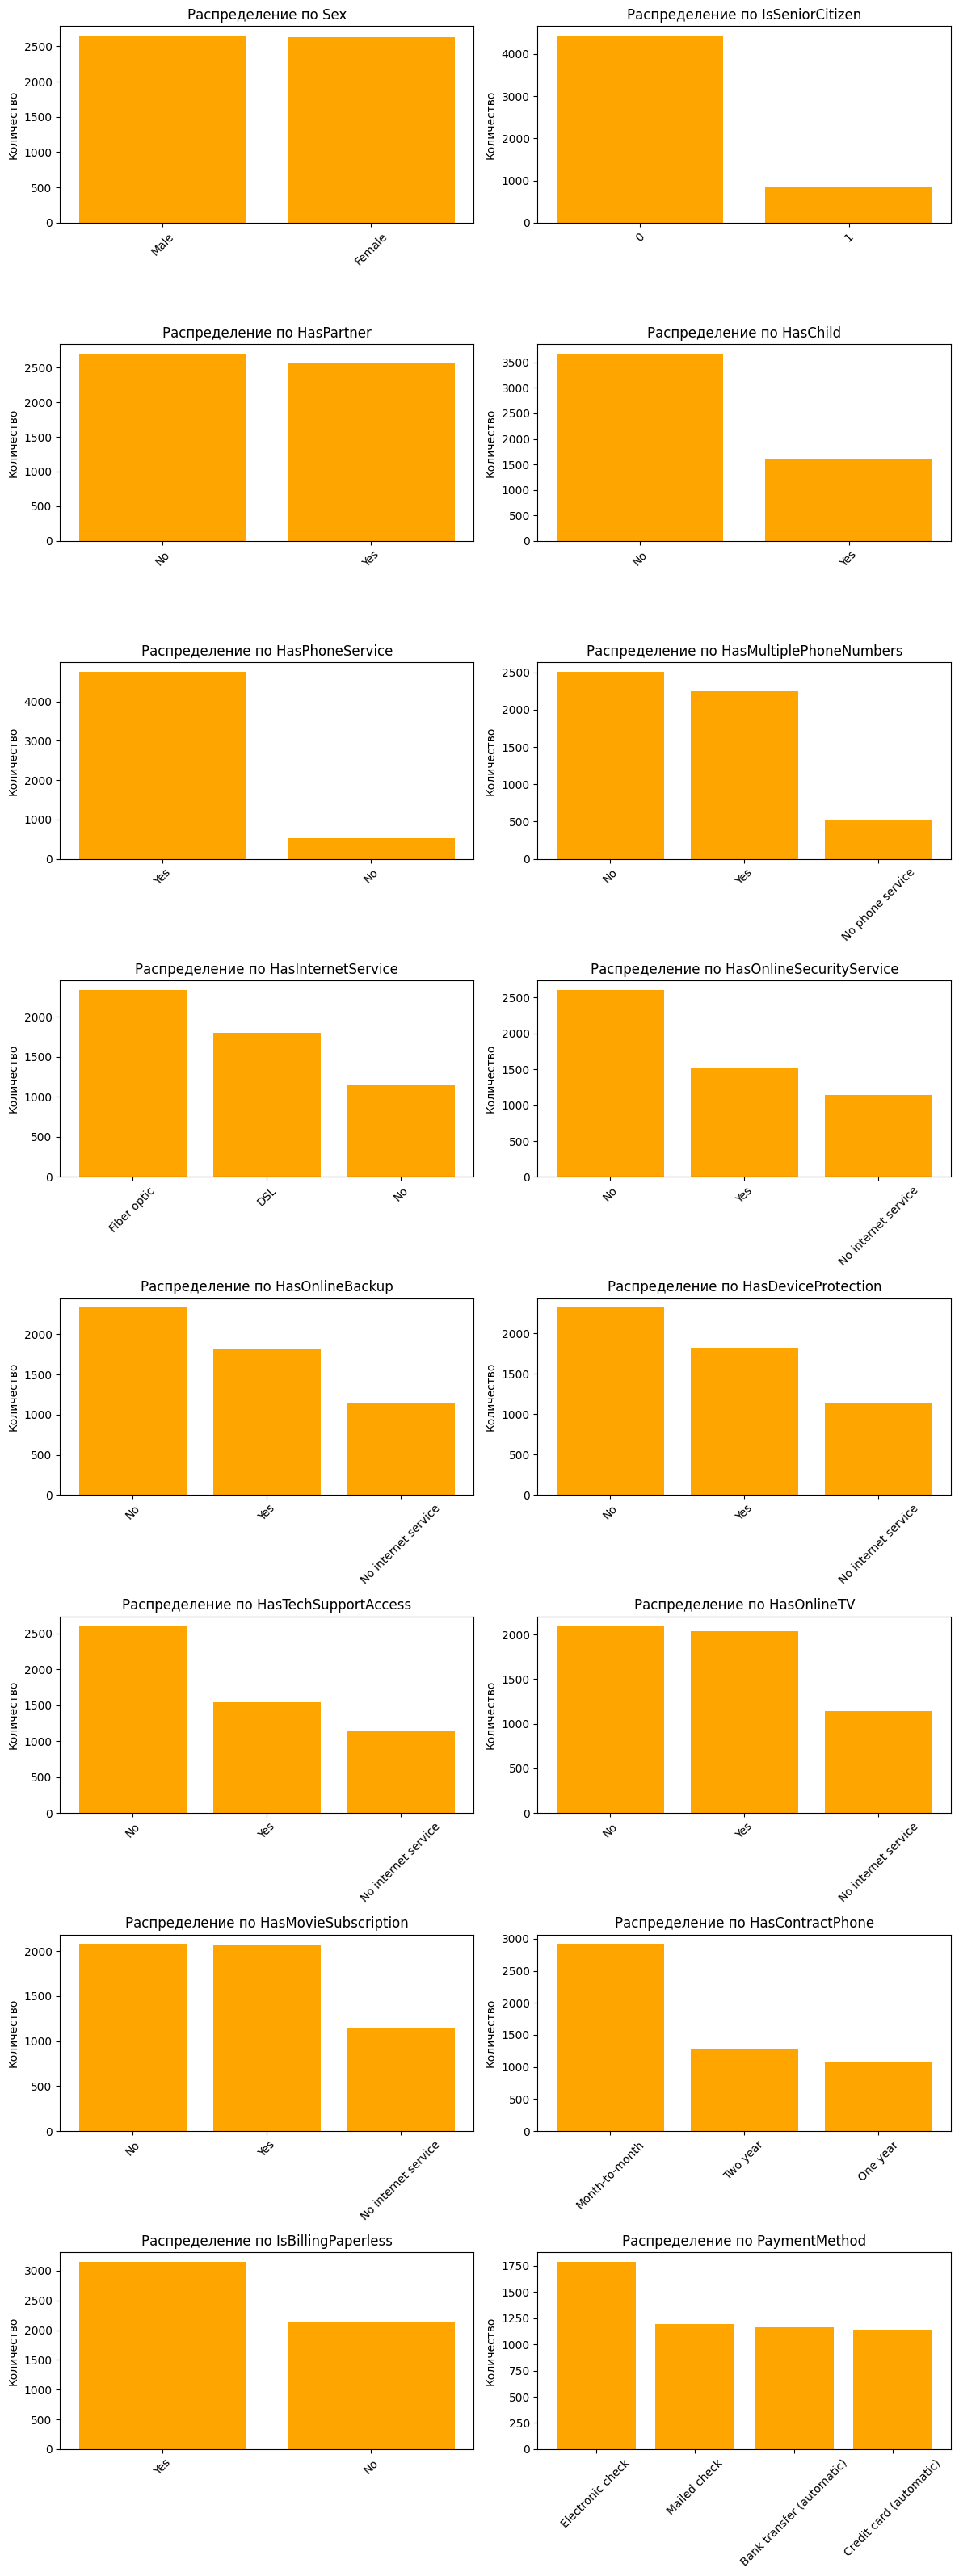

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что ваши данные загружены в DataFrame data

# Список категориальных признаков
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# Создаем подграфики для категориальных признаков
n_cols = len(cat_cols)
fig, axs = plt.subplots(n_cols // 2 + n_cols % 2, 2, figsize=(12, n_cols * 2))

# Проходим по каждому категориальному признаку и строим столбчатую диаграмму
for i, col in enumerate(cat_cols):
    row, col_index = divmod(i, 2)  # Определяем позицию подграфика
    counts = data[col].value_counts()
    axs[row, col_index].bar(counts.index.astype(str), counts.values, color='orange')
    axs[row, col_index].set_title(f'Распределение по {col}')
    axs[row, col_index].set_ylabel('Количество')
    axs[row, col_index].tick_params(axis='x', rotation=45)  # Поворачиваем метки по оси x

# Убираем пустые подграфики, если есть
for j in range(i + 1, n_cols // 2 + n_cols % 2):
    fig.delaxes(axs[j, 0])
    fig.delaxes(axs[j, 1])

plt.tight_layout()
plt.show()


Признаки в целом сбалансированны, кроме HasPhoneService, внимательнее изучим данный признак и его влияние на целевую переменную

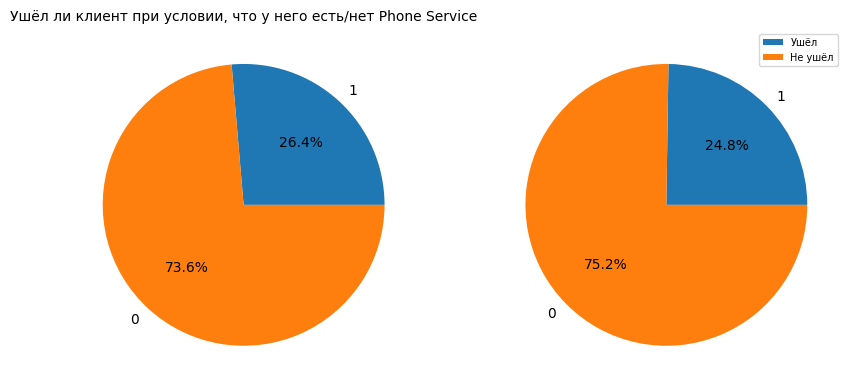

In [261]:
data_1 = data[data['HasPhoneService'] == "Yes"]['Churn'].value_counts().sort_values()
data_2 = data[data['HasPhoneService'] == "No"]['Churn'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Ушёл ли клиент при условии, что у него есть/нет Phone Service', fontsize=10)


plt.legend(['Ушёл', 'Не ушёл'], fontsize=7)

plt.show()


Можно сказать, что разница несущественна

Построим распределение целевой переменной

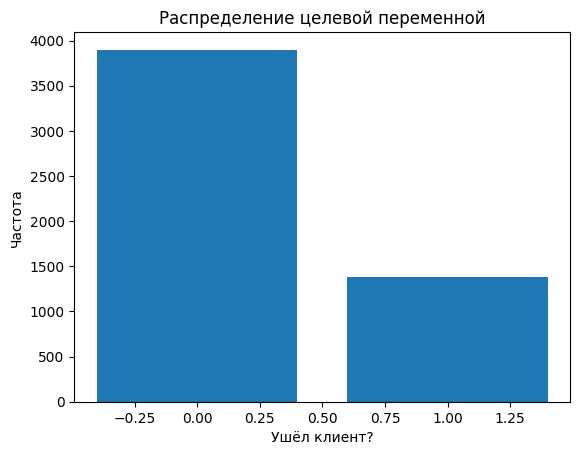

In [262]:
plt.bar(data["Churn"].unique(), data["Churn"].value_counts())
plt.title('Распределение целевой переменной')
plt.xlabel('Ушёл клиент?')
plt.ylabel('Частота')


plt.show()


Как видно, больше данных с клиентами, которые остались. Не будем использовать метрику accuracy как основную

Заменим категориальные признаки на числовые, используя label encoder и построим корреляционную матрицу

In [263]:
from sklearn.preprocessing import LabelEncoder
data_copy = data.copy()
for col_name in cat_cols:
  le = LabelEncoder()
  data_copy[col_name] = le.fit_transform(data_copy[col_name])

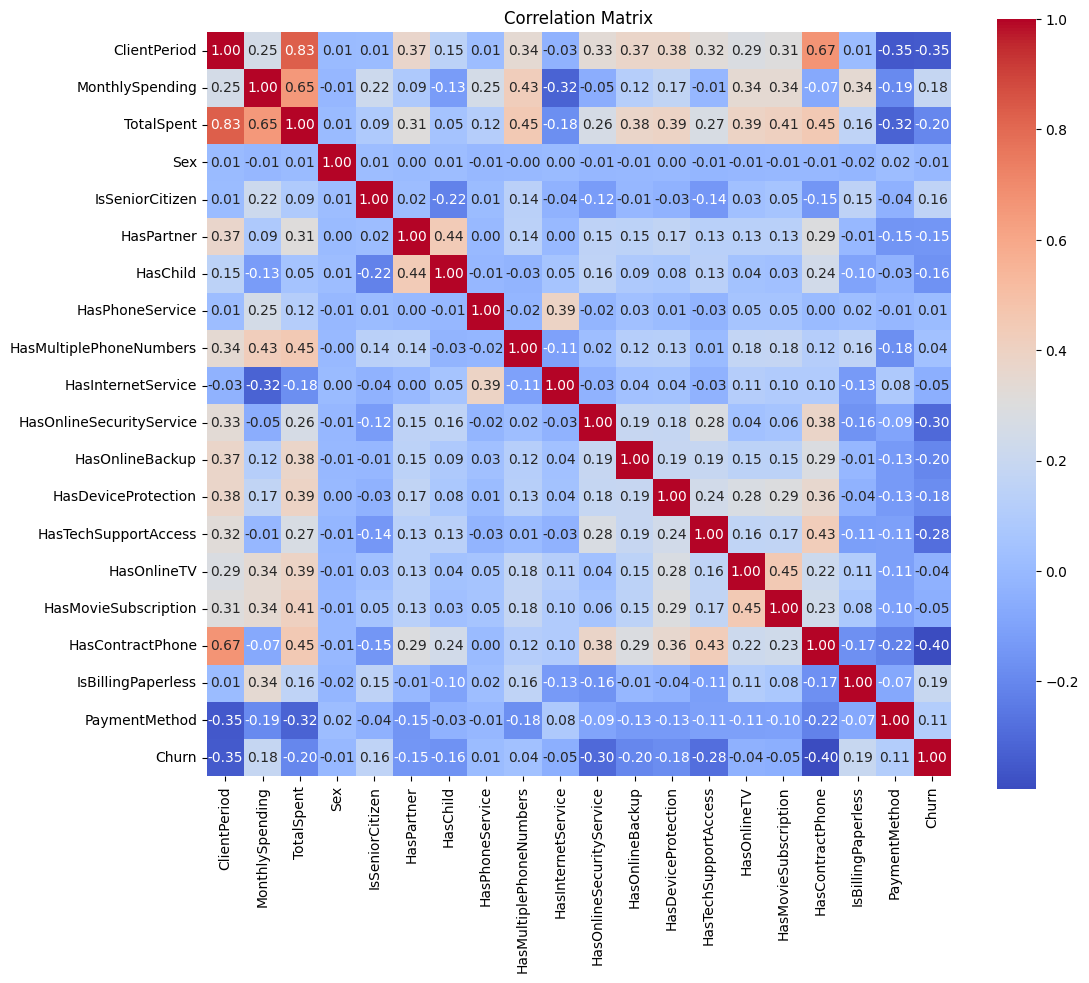

In [264]:
correlation_matrix = data_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Из корреляционной матрицы видно, что с целевой переменной больше всего коррелируют признаки HasContractPhone, ClientPeriod

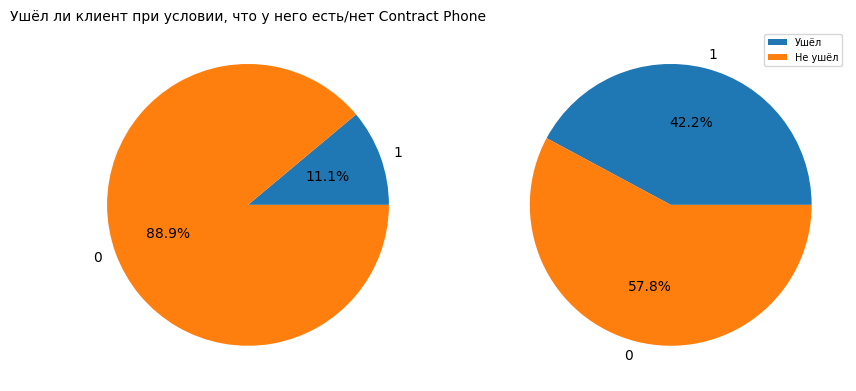

In [265]:
data_1 = data_copy[data_copy['HasContractPhone'] == 1]['Churn'].value_counts().sort_values()
data_2 = data_copy[data_copy['HasContractPhone'] == 0]['Churn'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Ушёл ли клиент при условии, что у него есть/нет Contract Phone', fontsize=10)


plt.legend(['Ушёл', 'Не ушёл'], fontsize=7)

plt.show()

Клиенты, которые арендуют какой-то номер менее склонны к уходу. Возможно, это связано с тем, что они являются постоянными клиентами

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [266]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Предобработка данных при помощи StandardScaler и OneHotEncoder. Я разделил данные на train/val, чтобы оценить roc-auc на данных, не участвующих в обучении.

In [267]:
X = data.drop(["Churn"], axis = 1)
y = data["Churn"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование числовых признаков
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])

# Преобразование категориальных признаков
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_val_encoded = encoder.transform(X_val[cat_cols])
data_test_encoded = encoder.transform(data_test[cat_cols])

# Создание финальных наборов данных
X_train_final = pd.DataFrame(X_train_encoded, index=X_train.index)
X_val_final = pd.DataFrame(X_val_encoded, index=X_val.index)
data_test_final = pd.DataFrame(data_test_encoded, index = data_test.index)

# Объединение числовых и закодированных категориальных признаков
X_train_final = pd.concat([X_train[num_cols].reset_index(drop=True), X_train_final.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val[num_cols].reset_index(drop=True), X_val_final.reset_index(drop=True)], axis=1)
data_test_final = pd.concat([data_test[num_cols].reset_index(drop=True), data_test_final.reset_index(drop=True)], axis=1)

X_train_final.columns = X_train_final.columns.astype(str)
X_val_final.columns = X_val_final.columns.astype(str)
data_test_final.columns = data_test_final.columns.astype(str)

Обучение модели LogisticRegressionCV

In [268]:
C_values = [100, 10, 1, 0.1, 0.01, 0.001]

# Инициализация модели LogisticRegressionCV
model = LogisticRegressionCV(
    Cs=C_values,
    cv=5,
    scoring='roc_auc',
    solver='liblinear',  # Используйте подходящий solver
    random_state=42
)

# Обучение модели
model.fit(X_train_final, y_train)
best_C = model.C_[0]
print(f'Лучшее значение C: {best_C}')

# Предсказание вероятностей для валидационной выборки
y_val_probs = model.predict_proba(X_val_final)[:, 1]

# Вычисление ROC-AUC для валидационной выборки
roc_auc = roc_auc_score(y_val, y_val_probs)
print(f'ROC-AUC на валидационной выборке: {roc_auc}')


Лучшее значение C: 10.0
ROC-AUC на валидационной выборке: 0.827906096175691


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [269]:
#!pip install catboost

In [272]:
X_train_final

,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,24,25,26
0,-0.059488,0.294371,-0.083151,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.079076,1.172548,1.649755,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.119739,1.137752,1.642300,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.076063,0.304313,-0.827889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.607694,-1.322798,-0.186746,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,-0.750759,0.894182,-0.432200,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4221,-0.547444,0.282773,-0.370583,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4222,0.713109,-1.461981,-0.533684,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4223,-0.994737,0.657240,-0.712947,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
from catboost import CatBoostClassifier, Pool
model_default = CatBoostClassifier(verbose = 0)

model_default.fit(X_train_final, y_train)

y_val_probs_default = model_default.predict_proba(X_val_final)[:, 1]

roc_auc_default = roc_auc_score(y_val, y_val_probs_default)
print(f'ROC-AUC с параметрами по умолчанию: {roc_auc_default}')

ROC-AUC с параметрами по умолчанию: 0.8195112715988955


In [275]:
model = CatBoostClassifier(verbose=0)

param_grid = {
    'iterations': [50, 100, 150, 170, 200],
    'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)

grid_search.fit(X_train_final, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший ROC-AUC на кросс-валидации: {best_score}')

best_model = grid_search.best_estimator_
y_val_probs = best_model.predict_proba(X_val_final)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_probs)

print(f'ROC-AUC на валидационной выборке: {roc_auc_val}')

Лучшие параметры: {'iterations': 100, 'learning_rate': 0.05}
Лучший ROC-AUC на кросс-валидации: 0.8491989291032441
ROC-AUC на валидационной выборке: 0.8309514134520368


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшие параметры: {'iterations': 100, 'learning_rate': 0.05}
Лучший ROC-AUC на кросс-валидации: 0.8491989291032441
ROC-AUC на валидационной выборке: 0.8309514134520368

# Предсказания

In [277]:
best_model = grid_search.best_estimator_

In [291]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(data_test_final)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.